<a href="https://colab.research.google.com/github/xnotpeke/retinopathy-dl/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np
import gc
from tqdm import tqdm

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/archive (1)/train_1.csv')
datat = pd.read_csv('/content/drive/MyDrive/archive (1)/test.csv')
datav = pd.read_csv('/content/drive/MyDrive/archive (1)/valid.csv')
#data
#datav
datat

,id_code,diagnosis
0,e4dcca36ceb4,0
1,e4e343eaae2a,2
2,e4f12411fd85,4
3,e50b0174690d,0
4,e5197d77ec68,0
...,...,...
361,ffa47f6a7bf4,2
362,ffc04fed30e6,0
363,ffcf7b45f213,2
364,ffd97f8cd5aa,0


In [ ]:
print(data.head())
print(data.info())
print(data.describe())
print(datat.describe())
print(datav.describe())
print(datat.info())
print(datav.info())

        id_code  diagnosis
0  1b329a127307          1
1  1b32e1d775ea          4
2  1b3647865779          0
3  1b398c0494d1          0
4  1b495ac025b7          3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    2851 non-null   object
 1   diagnosis  2851 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.7+ KB
None
         diagnosis
count  2851.000000
mean      1.105928
std       1.290996
min       0.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       4.000000
        diagnosis
count  366.000000
mean     1.057377
std      1.334264
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      4.000000
        diagnosis
count  366.000000
mean     1.163934
std      1.288690
min      0.000000
25%      0.000000
50%      1.000000
75%      2.000000
max      4.000000
<class 'pandas.core.frame

<Axes: ylabel='Frequency'>

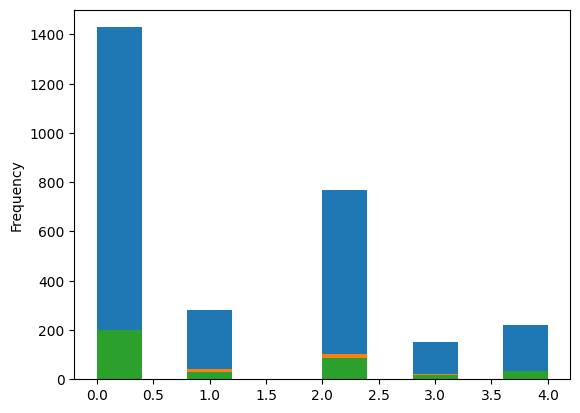

In [ ]:
data['diagnosis'].plot(kind='hist')
datav['diagnosis'].plot(kind='hist')
datat['diagnosis'].plot(kind='hist')

In [ ]:
import hashlib
import os

def find_and_remove_duplicates(image_folder):
    hashes = set()
    duplicates = []

    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):
            image_path = os.path.join(image_folder, filename)
            with open(image_path, "rb") as f:
                file_hash = hashlib.md5(f.read()).hexdigest()

            if file_hash in hashes:
                duplicates.append(image_path)
            else:
                hashes.add(file_hash)


    print("Duplicate images found:", duplicates)


    for duplicate_path in duplicates:
       os.remove(duplicate_path)


find_and_remove_duplicates("/content/drive/MyDrive/archive (1)/train_images/train_images")
find_and_remove_duplicates("/content/drive/MyDrive/archive (1)/test_images/test_images")
find_and_remove_duplicates("/content/drive/MyDrive/archive (1)/val_images/val_images")

KeyboardInterrupt: 

In [ ]:
Train_img = "/content/drive/MyDrive/archive (1)/train_images/train_images"
Train_csv = "/content/drive/MyDrive/archive (1)/train_1.csv"
Test_img = "/content/drive/MyDrive/archive (1)/test_images/test_images"
Test_csv = "/content/drive/MyDrive/archive (1)/test.csv"
traindf = pd.read_csv(Train_csv,dtype=str)
testdf = pd.read_csv(Test_csv,dtype=str)
valdf=pd.read_csv('/content/drive/MyDrive/archive (1)/valid.csv',dtype=str)



In [ ]:
from PIL import Image
import os

def check_image_scales(image_folder):
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_folder, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                print(f"{filename}: Width={width}, Height={height}")




In [ ]:
check_image_scales('/content/drive/MyDrive/archive (1)/train_images/train_images')

a0fd94e2ad76.png: Width=1050, Height=1050
a07d571bf7ba.png: Width=819, Height=614
a08a0133754a.png: Width=1050, Height=1050
a02dfd67a925.png: Width=819, Height=614
a06b353e7bed.png: Width=2048, Height=1536
a0445785e2f7.png: Width=2048, Height=1536
a06a63d866b2.png: Width=1050, Height=1050
a01c590c444f.png: Width=2416, Height=1736
a0a0cd8af5a6.png: Width=1844, Height=1226
a0b7ad98df57.png: Width=1050, Height=1050
a06e41bd2634.png: Width=2416, Height=1736
a0267206d51e.png: Width=2416, Height=1736
a14bbd9a583e.png: Width=2416, Height=1736
a182b5b191de.png: Width=3216, Height=2136
a15470303941.png: Width=2416, Height=1736
a15590a7d774.png: Width=3388, Height=2588
a14fcf84bfe1.png: Width=3216, Height=2136
a125377fb985.png: Width=3216, Height=2136
a12ca80bb8c7.png: Width=2048, Height=1536
a11c62cb3f86.png: Width=2588, Height=1958
a188c60b93fb.png: Width=2588, Height=1958
a11bf2edd470.png: Width=2588, Height=1958
a1822dd8d05d.png: Width=1050, Height=1050
a150ff5dfe07.png: Width=3388, Height=2

In [ ]:
data.shape

(2851, 2)

In [ ]:
valid_ids = []
for image_id in tqdm(data['id_code']):
    image_path = f'/content/drive/MyDrive/archive (1)/train_images/train_images/{image_id}.png'
    if os.path.exists(image_path):
        valid_ids.append(image_id)

filtered_data = data[data['id_code'].isin(valid_ids)]
valid_idsv = []
for image_id in tqdm(datav['id_code']):
    image_path = f'/content/drive/MyDrive/archive (1)/val_images/val_images/{image_id}.png'
    if os.path.exists(image_path):
        valid_idsv.append(image_id)
filtered_datav = datav[datav['id_code'].isin(valid_idsv)]
valid_idst = []
for image_id in tqdm(datat['id_code']):
    image_path = f'/content/drive/MyDrive/archive (1)/test_images/test_images/{image_id}.png'
    if os.path.exists(image_path):
        valid_idst.append(image_id)
filtered_datat = datat[datat['id_code'].isin(valid_idst)]

filtered_data.to_csv('/content/drive/MyDrive/archive (1)/train_1.csv', index=False)
filtered_datat.to_csv('/content/drive/MyDrive/archive (1)/test.csv', index=False)
filtered_datav.to_csv('/content/drive/MyDrive/archive (1)/val.csv', index=False)


100%|██████████| 366/366 [00:01<00:00, 216.44it/s]


In [ ]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3 :
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
            print(img.shape)
        return img

In [ ]:
import cv2
import numpy as np

def crop_image_from_gray(img, tol=7):
    """
    Crop the image to remove borders with pixel values below a given threshold.

    Parameters:
        img (numpy.ndarray): Input image (2D grayscale or 3D color).
        tol (int): Threshold for cropping.

    Returns:
        numpy.ndarray: Cropped image.
    """
    if img.ndim == 2:
        # Grayscale image
        mask = img > tol
        if mask.any():
            return img[np.ix_(mask.any(1), mask.any(0))]
        else:
            return img
    elif img.ndim == 3:
        # Color image
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol

        if mask.any():
            # Crop using the mask
            cropped_img = img[np.ix_(mask.any(1), mask.any(0))]
            return cropped_img
        else:
            return img
    else:
        raise ValueError("Input image must be either 2D grayscale or 3D color.")



In [ ]:

import cv2
import numpy as np
from tqdm import tqdm
desired_size=256
N1 = data.shape[0]
x_train1 = np.empty((N1, 256, 256, 3), dtype=np.uint8)
for i, image_id in tqdm(enumerate((data['id_code']))):
    image_path = f'/content/drive/MyDrive/archive (1)/train_images/train_images/{image_id}.png'
    im = cv2.imread(image_path)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.resize(im,(desired_size,desired_size))
    x_train1[i, :, :, :] = im

2851it [58:08,  1.22s/it]


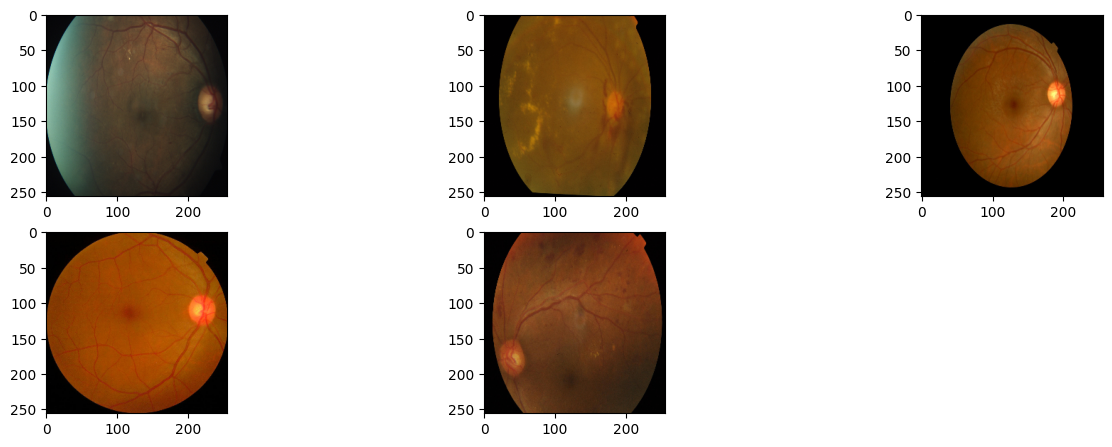

In [ ]:
plt.figure(figsize=(16,8))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train1[i])

3it [00:00,  7.60it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)
(553, 553) (553, 553) (553, 553)
(553, 553, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


5it [00:00,  6.72it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


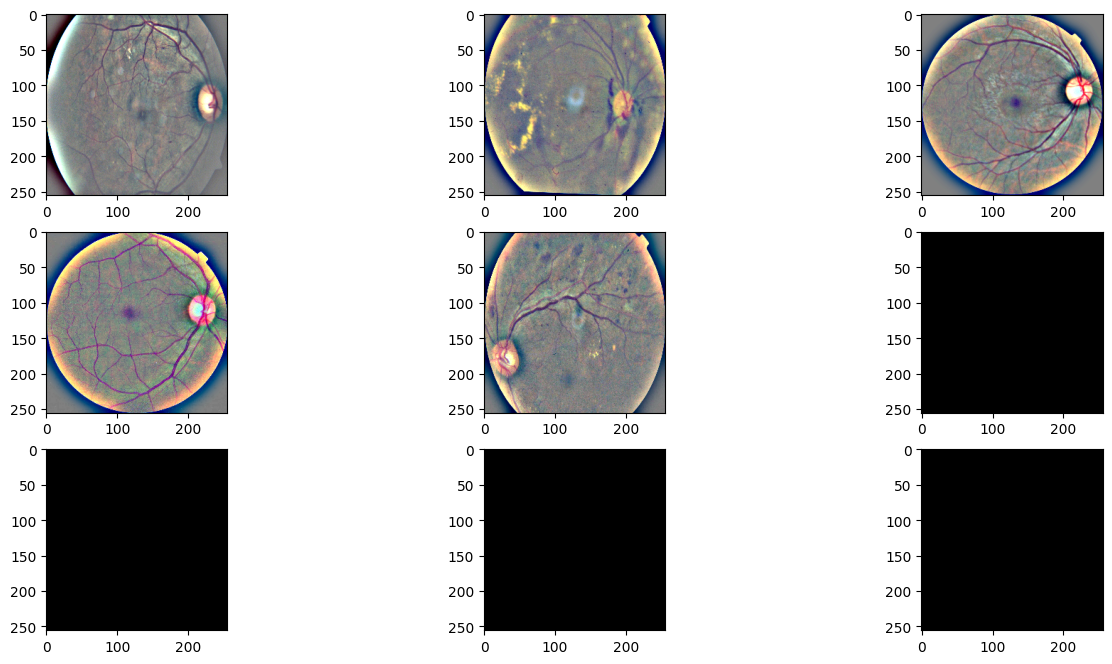

In [ ]:

def preprocess_image1(image_path, desired_size=256):
    im = cv2.imread(image_path)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = crop_image_from_gray(im)
    im = cv2.resize(im,(desired_size,)*2)
    im = cv2.addWeighted(im,4,cv2.GaussianBlur( im , (0,0) , 10) ,-4 ,128)
    return im
N1 = data.shape[0]
x_train2 = np.empty((N1, 256, 256, 3), dtype=np.uint8)
#tqdm
for i, image_id in tqdm(enumerate((data.head()['id_code']))):
    x_train2[i, :, :, :] = preprocess_image1(
        f'/content/drive/MyDrive/archive (1)/train_images/train_images/{image_id}.png'
    )
y_train = pd.get_dummies(data.head()['diagnosis']).values
plt.figure(figsize=(16,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train2[i])

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
import os

# Create a tone mapper
tone_mapper = cv2.createTonemapReinhard(gamma=0.5, intensity=0.0, light_adapt=1.0, color_adapt=0.0)

def adjust_brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

def center_crop(img):
    h, w, _ = img.shape
    min_dim = min(h, w)
    start_x = (w - min_dim) // 2
    start_y = (h - min_dim) // 2
    return img[start_y:start_y + min_dim, start_x:start_x + min_dim]

def preprocess_image1(image_path, desired_size=256):
    if not os.path.exists(image_path):
        print(f"Error: File not found - {image_path}")
        return None

    im = cv2.imread(image_path)
    if im is None:
        print(f"Error: Unable to read image - {image_path}")
        return None
    im = crop_image_from_gray(im)
    ##
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    #im = center_crop(im)
    im = cv2.resize(im, (desired_size, desired_size))
    im = cv2.addWeighted(im, 4.5, cv2.GaussianBlur(im, (0, 0), 10), -4, 18)

    # Convert the image to a float32 HDR image
    im_hdr = im.astype(np.float32) / 255.0

    # Apply tone mapping
    im_tone_mapped = tone_mapper.process(im_hdr)

    # Ensure no NaN or infinite values
    im_tone_mapped = np.nan_to_num(im_tone_mapped, nan=0.0, posinf=1.0, neginf=0.0)

    # Clip values to range [0, 1]
    im_tone_mapped = np.clip(im_tone_mapped, 0, 1)

    # Convert back to 8-bit
    im_tone_mapped = (im_tone_mapped * 255).astype(np.uint8)

    return im_tone_mapped

# Assuming 'data' is a pandas DataFrame containing the image IDs



In [ ]:
N1 = data.shape[0]
x_train1 = np.empty((N1, 256, 256, 3), dtype=np.uint8)

for i, image_id in tqdm(enumerate(data['id_code']), total=N1):
    image_path = f'/content/drive/MyDrive/archive (1)/train_images/train_images/{image_id}.png'
    processed_image = preprocess_image1(image_path)

    if processed_image is not None:
        bright_image = adjust_brightness(processed_image, 50)
        x_train1[i, :, :, :] = bright_image

In [ ]:
y_train = pd.get_dummies(data['diagnosis']).values

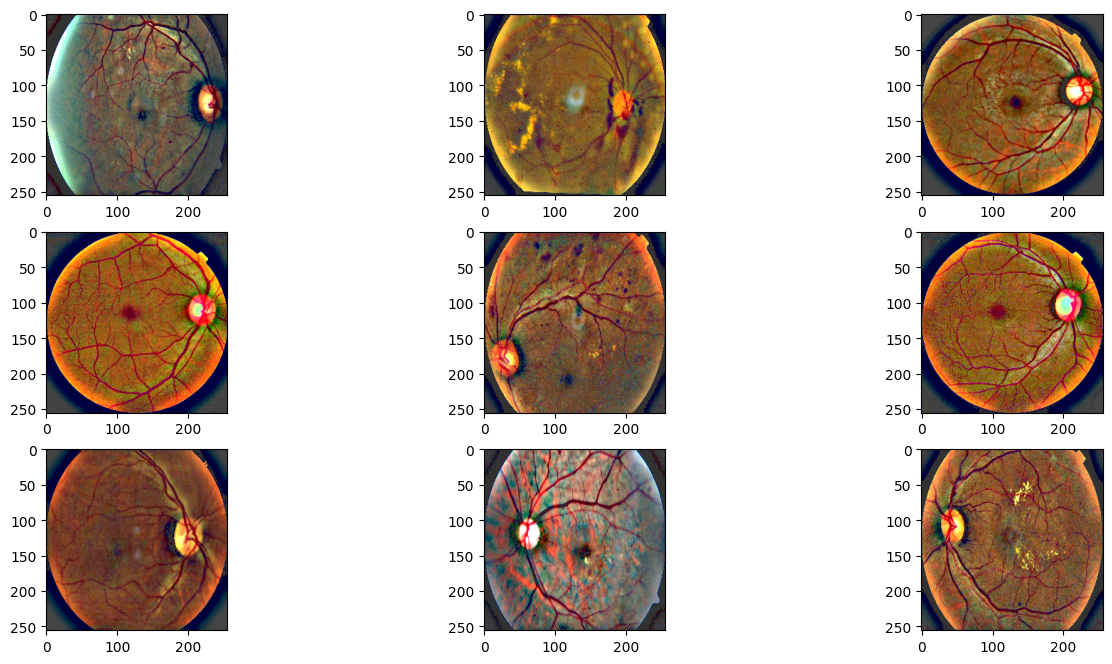

In [ ]:
plt.figure(figsize=(16,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train1[i])


In [ ]:
y_train_multi = np.empty(y_train.shape, dtype=y_train.dtype)
y_train_multi[:, 4] = y_train[:, 4]

for i in range(3, -1, -1):
    y_train_multi[:, i] = np.logical_or(y_train[:, i], y_train_multi[:, i+1])

print("Original y_train:", y_train.sum(axis=0))
print("Multilabel version:", y_train_multi.sum(axis=0))

Original y_train: [1429  282  769  151  220]
Multilabel version: [2851 1422 1140  371  220]


In [ ]:
np.save('y_train1.npy',y_train_multi)
np.save('x_train1.npy',x_train1)

In [ ]:
N2 = datat.shape[0]
x_test = np.empty((N2, 256, 256, 3), dtype=np.uint8)

for i, image_id in tqdm(enumerate(datat['id_code']), total=N2):
    image_path = f'/content/drive/MyDrive/archive (1)/test_images/test_images/{image_id}.png'
    processed_image = preprocess_image1(image_path)

    if processed_image is not None:
        bright_image = adjust_brightness(processed_image, 50)
        x_test[i, :, :, :] = bright_image

  0%|          | 1/366 [00:00<01:05,  5.54it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  1%|          | 2/366 [00:01<03:27,  1.75it/s]

(1424, 1804) (1424, 1804) (1424, 1804)
(1424, 1804, 3)


  1%|          | 3/366 [00:02<04:46,  1.27it/s]

(1755, 2048) (1755, 2048) (1755, 2048)
(1755, 2048, 3)


  1%|          | 4/366 [00:02<04:46,  1.26it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  1%|▏         | 5/366 [00:03<03:49,  1.57it/s]

(614, 760) (614, 760) (614, 760)
(614, 760, 3)


  2%|▏         | 6/366 [00:03<03:14,  1.85it/s]

(550, 550) (550, 550) (550, 550)
(550, 550, 3)


  2%|▏         | 7/366 [00:04<04:13,  1.42it/s]

(2136, 2714) (2136, 2714) (2136, 2714)
(2136, 2714, 3)


  2%|▏         | 8/366 [00:05<04:40,  1.27it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


  2%|▏         | 9/366 [00:06<05:29,  1.08it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


  3%|▎         | 10/366 [00:08<06:46,  1.14s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


  3%|▎         | 11/366 [00:09<06:07,  1.03s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  3%|▎         | 12/366 [00:09<05:18,  1.11it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  4%|▎         | 13/366 [00:10<05:37,  1.05it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


  4%|▍         | 14/366 [00:11<05:16,  1.11it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  4%|▍         | 15/366 [00:13<06:47,  1.16s/it]

(2136, 2721) (2136, 2721) (2136, 2721)
(2136, 2721, 3)


  4%|▍         | 16/366 [00:13<05:22,  1.08it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


  5%|▍         | 17/366 [00:14<05:00,  1.16it/s]

(1375, 1379) (1375, 1379) (1375, 1379)
(1375, 1379, 3)


  5%|▍         | 18/366 [00:15<04:47,  1.21it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  5%|▌         | 19/366 [00:16<05:14,  1.10it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  5%|▌         | 20/366 [00:18<06:29,  1.13s/it]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


  6%|▌         | 21/366 [00:19<07:23,  1.29s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


  6%|▌         | 22/366 [00:20<06:40,  1.17s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  6%|▋         | 23/366 [00:21<06:29,  1.14s/it]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


  7%|▋         | 24/366 [00:22<06:42,  1.18s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


  7%|▋         | 25/366 [00:23<05:53,  1.04s/it]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


  7%|▋         | 26/366 [00:24<05:08,  1.10it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  7%|▋         | 27/366 [00:24<04:33,  1.24it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  8%|▊         | 28/366 [00:25<03:54,  1.44it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


  8%|▊         | 29/366 [00:26<04:36,  1.22it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


  8%|▊         | 30/366 [00:27<05:13,  1.07it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


  8%|▊         | 31/366 [00:28<05:23,  1.04it/s]

(2136, 2733) (2136, 2733) (2136, 2733)
(2136, 2733, 3)


  9%|▊         | 32/366 [00:28<04:20,  1.28it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  9%|▉         | 33/366 [00:30<05:46,  1.04s/it]

(2136, 2715) (2136, 2715) (2136, 2715)
(2136, 2715, 3)


  9%|▉         | 34/366 [00:33<08:06,  1.47s/it]

(2136, 2721) (2136, 2721) (2136, 2721)
(2136, 2721, 3)


 10%|▉         | 35/366 [00:35<10:20,  1.88s/it]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


 10%|▉         | 36/366 [00:36<08:50,  1.61s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 10%|█         | 37/366 [00:37<07:49,  1.43s/it]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 10%|█         | 38/366 [00:39<07:40,  1.40s/it]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 11%|█         | 39/366 [00:39<05:49,  1.07s/it]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 11%|█         | 40/366 [00:40<05:04,  1.07it/s]

(1000, 1259) (1000, 1259) (1000, 1259)
(1000, 1259, 3)


 11%|█         | 41/366 [00:41<05:11,  1.04it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 11%|█▏        | 42/366 [00:41<04:38,  1.16it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 12%|█▏        | 43/366 [00:42<04:28,  1.20it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)


 12%|█▏        | 44/366 [00:43<04:01,  1.33it/s]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 12%|█▏        | 45/366 [00:43<03:54,  1.37it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 13%|█▎        | 46/366 [00:44<04:02,  1.32it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 13%|█▎        | 47/366 [00:45<04:58,  1.07it/s]

(2555, 3023) (2555, 3023) (2555, 3023)
(2555, 3023, 3)


 13%|█▎        | 48/366 [00:47<05:54,  1.12s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 13%|█▎        | 49/366 [00:48<05:39,  1.07s/it]

(1758, 2048) (1758, 2048) (1758, 2048)
(1758, 2048, 3)


 14%|█▎        | 50/366 [00:50<06:35,  1.25s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 14%|█▍        | 51/366 [00:51<06:39,  1.27s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 14%|█▍        | 52/366 [00:51<05:27,  1.04s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 14%|█▍        | 53/366 [00:53<05:44,  1.10s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 15%|█▍        | 54/366 [00:53<04:39,  1.12it/s]

(480, 640) (480, 640) (480, 640)
(480, 640, 3)


 15%|█▌        | 55/366 [00:54<05:26,  1.05s/it]

(2136, 2718) (2136, 2718) (2136, 2718)
(2136, 2718, 3)


 15%|█▌        | 56/366 [00:55<04:39,  1.11it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 16%|█▌        | 57/366 [00:55<03:46,  1.36it/s]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 16%|█▌        | 58/366 [00:56<03:30,  1.46it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 16%|█▌        | 59/366 [00:57<03:24,  1.50it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 16%|█▋        | 60/366 [00:57<03:23,  1.50it/s]

(1378, 1383) (1378, 1383) (1378, 1383)
(1378, 1383, 3)


 17%|█▋        | 61/366 [00:58<03:53,  1.31it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 17%|█▋        | 62/366 [01:00<04:43,  1.07it/s]

(2738, 3619) (2738, 3619) (2738, 3619)
(2738, 3619, 3)


 17%|█▋        | 63/366 [01:01<04:58,  1.02it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 17%|█▋        | 64/366 [01:02<05:52,  1.17s/it]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


 18%|█▊        | 65/366 [01:03<05:22,  1.07s/it]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 18%|█▊        | 66/366 [01:03<04:21,  1.15it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 18%|█▊        | 67/366 [01:04<04:22,  1.14it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 19%|█▊        | 68/366 [01:05<04:21,  1.14it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)


 19%|█▉        | 69/366 [01:07<05:19,  1.07s/it]

(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)


 19%|█▉        | 70/366 [01:08<05:29,  1.11s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 19%|█▉        | 71/366 [01:08<04:30,  1.09it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 20%|█▉        | 72/366 [01:09<04:26,  1.10it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 20%|█▉        | 73/366 [01:10<04:04,  1.20it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 20%|██        | 74/366 [01:11<04:30,  1.08it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 20%|██        | 75/366 [01:14<07:56,  1.64s/it]

(2732, 3621) (2732, 3621) (2732, 3621)
(2732, 3621, 3)


 21%|██        | 76/366 [01:15<06:17,  1.30s/it]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 21%|██        | 77/366 [01:16<05:44,  1.19s/it]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 21%|██▏       | 78/366 [01:18<07:09,  1.49s/it]

(2531, 3027) (2531, 3027) (2531, 3027)
(2531, 3027, 3)


 22%|██▏       | 79/366 [01:19<06:14,  1.30s/it]

(1381, 1384) (1381, 1384) (1381, 1384)
(1381, 1384, 3)


 22%|██▏       | 80/366 [01:20<05:47,  1.21s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 22%|██▏       | 81/366 [01:21<05:50,  1.23s/it]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


 22%|██▏       | 82/366 [01:22<05:25,  1.15s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 23%|██▎       | 83/366 [01:23<04:43,  1.00s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 23%|██▎       | 84/366 [01:23<03:51,  1.22it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 23%|██▎       | 85/366 [01:24<03:40,  1.28it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 23%|██▎       | 86/366 [01:25<03:53,  1.20it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 24%|██▍       | 87/366 [01:26<04:21,  1.06it/s]

(1424, 1805) (1424, 1805) (1424, 1805)
(1424, 1805, 3)


 24%|██▍       | 88/366 [01:28<05:02,  1.09s/it]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 24%|██▍       | 89/366 [01:28<04:07,  1.12it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 25%|██▍       | 90/366 [01:29<03:44,  1.23it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 25%|██▍       | 91/366 [01:29<03:41,  1.24it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 25%|██▌       | 92/366 [01:30<03:25,  1.33it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 25%|██▌       | 93/366 [01:31<03:58,  1.14it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


 26%|██▌       | 94/366 [01:32<03:33,  1.27it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 26%|██▌       | 95/366 [01:33<04:16,  1.06it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 26%|██▌       | 96/366 [01:34<03:45,  1.20it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 27%|██▋       | 97/366 [01:34<03:10,  1.41it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 27%|██▋       | 98/366 [01:35<03:46,  1.18it/s]

(2520, 3035) (2520, 3035) (2520, 3035)
(2520, 3035, 3)


 27%|██▋       | 99/366 [01:36<03:39,  1.22it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 27%|██▋       | 100/366 [01:37<03:43,  1.19it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 28%|██▊       | 101/366 [01:38<03:52,  1.14it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


 28%|██▊       | 102/366 [01:39<04:03,  1.08it/s]

(2136, 2720) (2136, 2720) (2136, 2720)
(2136, 2720, 3)


 28%|██▊       | 103/366 [01:40<03:53,  1.12it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 28%|██▊       | 104/366 [01:40<03:39,  1.20it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 29%|██▊       | 105/366 [01:41<03:23,  1.28it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 29%|██▉       | 106/366 [01:42<03:19,  1.30it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 29%|██▉       | 107/366 [01:42<03:12,  1.35it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 30%|██▉       | 108/366 [01:44<03:50,  1.12it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 30%|██▉       | 109/366 [01:45<04:01,  1.06it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 30%|███       | 110/366 [01:45<03:16,  1.30it/s]

(554, 552) (554, 552) (554, 552)
(554, 552, 3)


 30%|███       | 111/366 [01:46<02:52,  1.48it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 31%|███       | 112/366 [01:47<03:33,  1.19it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 31%|███       | 113/366 [01:48<03:31,  1.20it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 31%|███       | 114/366 [01:48<03:32,  1.18it/s]

(552, 550) (552, 550) (552, 550)
(552, 550, 3)


 31%|███▏      | 115/366 [01:49<03:29,  1.20it/s]

(1736, 2267) (1736, 2267) (1736, 2267)
(1736, 2267, 3)


 32%|███▏      | 116/366 [01:50<03:20,  1.25it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 32%|███▏      | 117/366 [01:50<02:45,  1.50it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 32%|███▏      | 118/366 [01:51<02:43,  1.51it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 33%|███▎      | 119/366 [01:52<03:06,  1.33it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 33%|███▎      | 120/366 [01:52<02:36,  1.57it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 33%|███▎      | 121/366 [01:53<02:19,  1.75it/s]

(614, 760) (614, 760) (614, 760)
(614, 760, 3)


 33%|███▎      | 122/366 [01:54<02:46,  1.46it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 34%|███▎      | 123/366 [01:54<02:24,  1.68it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 34%|███▍      | 124/366 [01:55<03:08,  1.28it/s]

(2136, 2718) (2136, 2718) (2136, 2718)
(2136, 2718, 3)


 34%|███▍      | 125/366 [01:56<02:49,  1.43it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 34%|███▍      | 126/366 [01:56<02:38,  1.51it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 35%|███▍      | 127/366 [01:57<02:15,  1.77it/s]

(553, 550) (553, 550) (553, 550)
(553, 550, 3)


 35%|███▍      | 128/366 [01:58<03:15,  1.22it/s]

(2136, 2714) (2136, 2714) (2136, 2714)
(2136, 2714, 3)


 35%|███▌      | 129/366 [02:00<04:20,  1.10s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 36%|███▌      | 130/366 [02:01<04:18,  1.10s/it]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 36%|███▌      | 131/366 [02:03<04:48,  1.23s/it]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


 36%|███▌      | 132/366 [02:04<04:57,  1.27s/it]

(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)


 36%|███▋      | 133/366 [02:05<04:16,  1.10s/it]

(1380, 1381) (1380, 1381) (1380, 1381)
(1380, 1381, 3)


 37%|███▋      | 134/366 [02:05<03:28,  1.11it/s]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 37%|███▋      | 135/366 [02:06<03:41,  1.04it/s]

(2535, 3025) (2535, 3025) (2535, 3025)
(2535, 3025, 3)


 37%|███▋      | 136/366 [02:07<04:05,  1.07s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 37%|███▋      | 137/366 [02:08<03:16,  1.16it/s]

(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


 38%|███▊      | 138/366 [02:09<03:13,  1.18it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 38%|███▊      | 139/366 [02:09<03:10,  1.19it/s]

(1381, 1384) (1381, 1384) (1381, 1384)
(1381, 1384, 3)


 38%|███▊      | 140/366 [02:10<03:03,  1.23it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 39%|███▊      | 141/366 [02:11<02:33,  1.47it/s]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 39%|███▉      | 142/366 [02:12<03:04,  1.22it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 39%|███▉      | 143/366 [02:13<03:33,  1.04it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 39%|███▉      | 144/366 [02:14<03:13,  1.15it/s]

(1382, 1378) (1382, 1378) (1382, 1378)
(1382, 1378, 3)


 40%|███▉      | 145/366 [02:15<03:11,  1.16it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 40%|███▉      | 146/366 [02:15<02:51,  1.28it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 40%|████      | 147/366 [02:15<02:21,  1.54it/s]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 40%|████      | 148/366 [02:16<02:13,  1.63it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 41%|████      | 149/366 [02:17<02:13,  1.62it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 41%|████      | 150/366 [02:18<03:00,  1.19it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 41%|████▏     | 151/366 [02:19<02:50,  1.26it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 42%|████▏     | 152/366 [02:20<03:11,  1.12it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 42%|████▏     | 153/366 [02:21<03:04,  1.15it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 42%|████▏     | 154/366 [02:22<03:12,  1.10it/s]

(1378, 1385) (1378, 1385) (1378, 1385)
(1378, 1385, 3)


 42%|████▏     | 155/366 [02:22<02:54,  1.21it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 43%|████▎     | 156/366 [02:23<02:41,  1.30it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 43%|████▎     | 157/366 [02:24<03:06,  1.12it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 43%|████▎     | 158/366 [02:25<03:14,  1.07it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 43%|████▎     | 159/366 [02:26<03:22,  1.02it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 44%|████▎     | 160/366 [02:27<03:37,  1.06s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 44%|████▍     | 161/366 [02:28<03:29,  1.02s/it]

(2136, 2726) (2136, 2726) (2136, 2726)
(2136, 2726, 3)


 44%|████▍     | 162/366 [02:29<03:17,  1.03it/s]

(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


 45%|████▍     | 163/366 [02:30<03:11,  1.06it/s]

(1378, 1377) (1378, 1377) (1378, 1377)
(1378, 1377, 3)


 45%|████▍     | 164/366 [02:30<02:34,  1.31it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 45%|████▌     | 165/366 [02:32<02:56,  1.14it/s]

(2136, 2708) (2136, 2708) (2136, 2708)
(2136, 2708, 3)


 45%|████▌     | 166/366 [02:32<02:41,  1.24it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 46%|████▌     | 167/366 [02:33<02:41,  1.23it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 46%|████▌     | 168/366 [02:34<03:18,  1.00s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 46%|████▌     | 169/366 [02:35<03:02,  1.08it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 46%|████▋     | 170/366 [02:36<03:01,  1.08it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 47%|████▋     | 171/366 [02:38<03:35,  1.11s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 47%|████▋     | 172/366 [02:38<03:11,  1.01it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 47%|████▋     | 173/366 [02:39<02:35,  1.24it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 48%|████▊     | 174/366 [02:39<02:08,  1.49it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 48%|████▊     | 175/366 [02:39<01:49,  1.75it/s]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 48%|████▊     | 176/366 [02:40<02:11,  1.44it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 48%|████▊     | 177/366 [02:42<02:40,  1.18it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 49%|████▊     | 178/366 [02:42<02:07,  1.47it/s]

(551, 551) (551, 551) (551, 551)
(551, 551, 3)


 49%|████▉     | 179/366 [02:43<02:21,  1.32it/s]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 49%|████▉     | 180/366 [02:43<02:02,  1.52it/s]

(480, 640) (480, 640) (480, 640)
(480, 640, 3)


 49%|████▉     | 181/366 [02:45<02:40,  1.15it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 50%|████▉     | 182/366 [02:45<02:28,  1.24it/s]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 50%|█████     | 183/366 [02:46<02:10,  1.40it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 50%|█████     | 184/366 [02:46<02:04,  1.46it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)


 51%|█████     | 185/366 [02:47<02:14,  1.35it/s]

(2136, 2714) (2136, 2714) (2136, 2714)
(2136, 2714, 3)


 51%|█████     | 186/366 [02:48<01:54,  1.57it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 51%|█████     | 187/366 [02:48<01:50,  1.62it/s]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 51%|█████▏    | 188/366 [02:49<01:55,  1.54it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 52%|█████▏    | 189/366 [02:50<02:02,  1.45it/s]

(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


 52%|█████▏    | 190/366 [02:51<02:06,  1.39it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 52%|█████▏    | 191/366 [02:51<02:16,  1.28it/s]

(1380, 1378) (1380, 1378) (1380, 1378)
(1380, 1378, 3)


 52%|█████▏    | 192/366 [02:53<02:50,  1.02it/s]

(2136, 2716) (2136, 2716) (2136, 2716)
(2136, 2716, 3)


 53%|█████▎    | 193/366 [02:54<02:54,  1.01s/it]

(2136, 2732) (2136, 2732) (2136, 2732)
(2136, 2732, 3)


 53%|█████▎    | 194/366 [02:55<02:45,  1.04it/s]

(1379, 1383) (1379, 1383) (1379, 1383)
(1379, 1383, 3)


 53%|█████▎    | 195/366 [02:56<03:10,  1.12s/it]

(2136, 2733) (2136, 2733) (2136, 2733)
(2136, 2733, 3)


 54%|█████▎    | 196/366 [02:57<02:41,  1.05it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 54%|█████▍    | 197/366 [02:57<02:14,  1.25it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 54%|█████▍    | 198/366 [02:58<02:08,  1.31it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 54%|█████▍    | 199/366 [02:59<02:10,  1.28it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 55%|█████▍    | 200/366 [03:00<02:19,  1.19it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 55%|█████▍    | 201/366 [03:00<02:05,  1.32it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 55%|█████▌    | 202/366 [03:01<02:04,  1.32it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 55%|█████▌    | 203/366 [03:02<02:02,  1.33it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 56%|█████▌    | 204/366 [03:03<02:19,  1.17it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)


 56%|█████▌    | 205/366 [03:04<02:03,  1.30it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 56%|█████▋    | 206/366 [03:05<02:39,  1.01it/s]

(2136, 2715) (2136, 2715) (2136, 2715)
(2136, 2715, 3)


 57%|█████▋    | 207/366 [03:06<02:15,  1.17it/s]

(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


 57%|█████▋    | 208/366 [03:06<02:14,  1.18it/s]

(1380, 1378) (1380, 1378) (1380, 1378)
(1380, 1378, 3)


 57%|█████▋    | 209/366 [03:07<02:04,  1.26it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 57%|█████▋    | 210/366 [03:08<02:07,  1.22it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 58%|█████▊    | 211/366 [03:09<02:24,  1.07it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


 58%|█████▊    | 212/366 [03:10<02:34,  1.00s/it]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


 58%|█████▊    | 213/366 [03:12<02:42,  1.07s/it]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 58%|█████▊    | 214/366 [03:12<02:29,  1.02it/s]

(1379, 1380) (1379, 1380) (1379, 1380)
(1379, 1380, 3)


 59%|█████▊    | 215/366 [03:13<01:55,  1.31it/s]

(553, 550) (553, 550) (553, 550)
(553, 550, 3)


 59%|█████▉    | 216/366 [03:14<02:07,  1.18it/s]

(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)


 59%|█████▉    | 217/366 [03:15<02:15,  1.10it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 60%|█████▉    | 218/366 [03:16<02:52,  1.16s/it]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


 60%|█████▉    | 219/366 [03:18<02:58,  1.21s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 60%|██████    | 220/366 [03:18<02:33,  1.05s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 60%|██████    | 221/366 [03:20<02:33,  1.06s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 61%|██████    | 222/366 [03:20<02:15,  1.06it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 61%|██████    | 223/366 [03:21<02:15,  1.06it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 61%|██████    | 224/366 [03:23<02:48,  1.19s/it]

(2525, 3028) (2525, 3028) (2525, 3028)
(2525, 3028, 3)


 61%|██████▏   | 225/366 [03:24<02:31,  1.08s/it]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 62%|██████▏   | 226/366 [03:25<02:22,  1.02s/it]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 62%|██████▏   | 227/366 [03:26<02:36,  1.12s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 62%|██████▏   | 228/366 [03:26<02:02,  1.13it/s]

(1050, 1049) (1050, 1049) (1050, 1049)
(1050, 1049, 3)


 63%|██████▎   | 229/366 [03:28<02:28,  1.08s/it]

(2532, 3024) (2532, 3024) (2532, 3024)
(2532, 3024, 3)


 63%|██████▎   | 230/366 [03:29<02:26,  1.08s/it]

(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)


 63%|██████▎   | 231/366 [03:29<01:53,  1.19it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 63%|██████▎   | 232/366 [03:30<01:52,  1.19it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 64%|██████▎   | 233/366 [03:31<01:37,  1.36it/s]

(1380, 1381) (1380, 1381) (1380, 1381)
(1380, 1381, 3)


 64%|██████▍   | 234/366 [03:32<01:52,  1.17it/s]

(2536, 3024) (2536, 3024) (2536, 3024)
(2536, 3024, 3)


 64%|██████▍   | 235/366 [03:32<01:36,  1.36it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 64%|██████▍   | 236/366 [03:33<01:46,  1.22it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 65%|██████▍   | 237/366 [03:34<01:46,  1.21it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 65%|██████▌   | 238/366 [03:35<02:09,  1.01s/it]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 65%|██████▌   | 239/366 [03:37<02:14,  1.06s/it]

(2136, 2718) (2136, 2718) (2136, 2718)
(2136, 2718, 3)


 66%|██████▌   | 240/366 [03:38<02:42,  1.29s/it]

(2518, 3033) (2518, 3033) (2518, 3033)
(2518, 3033, 3)


 66%|██████▌   | 241/366 [03:39<02:22,  1.14s/it]

(1378, 1388) (1378, 1388) (1378, 1388)
(1378, 1388, 3)


 66%|██████▌   | 242/366 [03:40<01:59,  1.04it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 66%|██████▋   | 243/366 [03:41<01:53,  1.08it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 67%|██████▋   | 244/366 [03:41<01:49,  1.11it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 67%|██████▋   | 245/366 [03:43<02:06,  1.05s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 67%|██████▋   | 246/366 [03:43<01:49,  1.10it/s]

(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


 67%|██████▋   | 247/366 [03:44<01:38,  1.21it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 68%|██████▊   | 248/366 [03:45<01:33,  1.26it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 68%|██████▊   | 249/366 [03:45<01:22,  1.41it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 68%|██████▊   | 250/366 [03:47<01:45,  1.10it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


 69%|██████▊   | 251/366 [03:48<01:47,  1.07it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 69%|██████▉   | 252/366 [03:48<01:38,  1.16it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 69%|██████▉   | 253/366 [03:49<01:26,  1.31it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 69%|██████▉   | 254/366 [03:50<01:40,  1.12it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 70%|██████▉   | 255/366 [03:51<01:41,  1.09it/s]

(1377, 1379) (1377, 1379) (1377, 1379)
(1377, 1379, 3)


 70%|██████▉   | 256/366 [03:52<01:28,  1.24it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 70%|███████   | 257/366 [03:53<01:54,  1.05s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 70%|███████   | 258/366 [03:54<01:57,  1.09s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 71%|███████   | 259/366 [03:55<01:52,  1.05s/it]

(1378, 1386) (1378, 1386) (1378, 1386)
(1378, 1386, 3)


 71%|███████   | 260/366 [03:57<02:07,  1.20s/it]

(2507, 3021) (2507, 3021) (2507, 3021)
(2507, 3021, 3)


 71%|███████▏  | 261/366 [03:58<01:48,  1.03s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 72%|███████▏  | 262/366 [03:59<01:50,  1.06s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 72%|███████▏  | 263/366 [03:59<01:27,  1.17it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 72%|███████▏  | 264/366 [04:00<01:31,  1.12it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)


 72%|███████▏  | 265/366 [04:01<01:33,  1.08it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 73%|███████▎  | 266/366 [04:02<01:32,  1.08it/s]

(1736, 2255) (1736, 2255) (1736, 2255)
(1736, 2255, 3)


 73%|███████▎  | 267/366 [04:03<01:31,  1.08it/s]

(1375, 1377) (1375, 1377) (1375, 1377)
(1375, 1377, 3)


 73%|███████▎  | 268/366 [04:04<01:30,  1.08it/s]

(2136, 2741) (2136, 2741) (2136, 2741)
(2136, 2741, 3)


 73%|███████▎  | 269/366 [04:05<01:29,  1.08it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 74%|███████▍  | 270/366 [04:05<01:19,  1.21it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 74%|███████▍  | 271/366 [04:07<01:35,  1.01s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 74%|███████▍  | 272/366 [04:07<01:18,  1.20it/s]

(553, 552) (553, 552) (553, 552)
(553, 552, 3)


 75%|███████▍  | 273/366 [04:08<01:20,  1.15it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 75%|███████▍  | 274/366 [04:09<01:09,  1.32it/s]

(614, 760) (614, 760) (614, 760)
(614, 760, 3)


 75%|███████▌  | 275/366 [04:09<01:01,  1.47it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 75%|███████▌  | 276/366 [04:10<01:05,  1.37it/s]

(2136, 2708) (2136, 2708) (2136, 2708)
(2136, 2708, 3)


 76%|███████▌  | 277/366 [04:11<01:21,  1.09it/s]

(2531, 3027) (2531, 3027) (2531, 3027)
(2531, 3027, 3)


 76%|███████▌  | 278/366 [04:12<01:11,  1.24it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 76%|███████▌  | 279/366 [04:13<01:07,  1.29it/s]

(1750, 2047) (1750, 2047) (1750, 2047)
(1750, 2047, 3)


 77%|███████▋  | 280/366 [04:13<01:00,  1.43it/s]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 77%|███████▋  | 281/366 [04:15<01:29,  1.05s/it]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


 77%|███████▋  | 282/366 [04:15<01:12,  1.16it/s]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 77%|███████▋  | 283/366 [04:16<01:03,  1.31it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 78%|███████▊  | 284/366 [04:17<01:09,  1.18it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 78%|███████▊  | 285/366 [04:18<01:09,  1.17it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 78%|███████▊  | 286/366 [04:19<01:09,  1.16it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 78%|███████▊  | 287/366 [04:20<01:16,  1.04it/s]

(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)


 79%|███████▊  | 288/366 [04:21<01:07,  1.16it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 79%|███████▉  | 289/366 [04:22<01:11,  1.08it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 79%|███████▉  | 290/366 [04:23<01:18,  1.03s/it]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)


 80%|███████▉  | 291/366 [04:24<01:24,  1.13s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 80%|███████▉  | 292/366 [04:26<01:25,  1.16s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 80%|████████  | 293/366 [04:26<01:18,  1.07s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 80%|████████  | 294/366 [04:28<01:26,  1.20s/it]

(1755, 2049) (1755, 2049) (1755, 2049)
(1755, 2049, 3)


 81%|████████  | 295/366 [04:28<01:12,  1.02s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 81%|████████  | 296/366 [04:31<01:34,  1.35s/it]

(2535, 3031) (2535, 3031) (2535, 3031)
(2535, 3031, 3)


 81%|████████  | 297/366 [04:31<01:18,  1.13s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 81%|████████▏ | 298/366 [04:32<01:14,  1.09s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 82%|████████▏ | 299/366 [04:33<01:04,  1.04it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 82%|████████▏ | 300/366 [04:35<01:32,  1.41s/it]

(2512, 3031) (2512, 3031) (2512, 3031)
(2512, 3031, 3)


 82%|████████▏ | 301/366 [04:36<01:20,  1.24s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 83%|████████▎ | 302/366 [04:37<01:06,  1.04s/it]

(1226, 1504) (1226, 1504) (1226, 1504)
(1226, 1504, 3)


 83%|████████▎ | 303/366 [04:38<01:03,  1.02s/it]

(1226, 1509) (1226, 1509) (1226, 1509)
(1226, 1509, 3)


 83%|████████▎ | 304/366 [04:38<00:58,  1.06it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 83%|████████▎ | 305/366 [04:39<00:46,  1.33it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 84%|████████▎ | 306/366 [04:39<00:39,  1.52it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 84%|████████▍ | 307/366 [04:40<00:36,  1.61it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 84%|████████▍ | 308/366 [04:41<00:38,  1.52it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 84%|████████▍ | 309/366 [04:41<00:35,  1.62it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 85%|████████▍ | 310/366 [04:42<00:41,  1.35it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 85%|████████▍ | 311/366 [04:42<00:33,  1.64it/s]

(552, 550) (552, 550) (552, 550)
(552, 550, 3)


 85%|████████▌ | 312/366 [04:44<00:46,  1.15it/s]

(2136, 2720) (2136, 2720) (2136, 2720)
(2136, 2720, 3)


 86%|████████▌ | 313/366 [04:45<00:56,  1.07s/it]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


 86%|████████▌ | 314/366 [04:47<01:08,  1.32s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 86%|████████▌ | 315/366 [04:48<01:00,  1.18s/it]

(2136, 2731) (2136, 2731) (2136, 2731)
(2136, 2731, 3)


 86%|████████▋ | 316/366 [04:49<00:57,  1.14s/it]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 87%|████████▋ | 317/366 [04:50<00:50,  1.04s/it]

(1378, 1382) (1378, 1382) (1378, 1382)
(1378, 1382, 3)


 87%|████████▋ | 318/366 [04:51<00:44,  1.07it/s]

(1377, 1382) (1377, 1382) (1377, 1382)
(1377, 1382, 3)


 87%|████████▋ | 319/366 [04:51<00:35,  1.31it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 87%|████████▋ | 320/366 [04:52<00:40,  1.13it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 88%|████████▊ | 321/366 [04:54<00:46,  1.03s/it]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 88%|████████▊ | 322/366 [04:55<00:51,  1.16s/it]

(2527, 3034) (2527, 3034) (2527, 3034)
(2527, 3034, 3)


 88%|████████▊ | 323/366 [04:56<00:47,  1.10s/it]

(1747, 2048) (1747, 2048) (1747, 2048)
(1747, 2048, 3)


 89%|████████▊ | 324/366 [04:57<00:40,  1.04it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 89%|████████▉ | 325/366 [04:57<00:36,  1.11it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 89%|████████▉ | 326/366 [04:58<00:32,  1.21it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 89%|████████▉ | 327/366 [04:59<00:30,  1.27it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 90%|████████▉ | 328/366 [05:00<00:30,  1.24it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 90%|████████▉ | 329/366 [05:00<00:27,  1.33it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 90%|█████████ | 330/366 [05:01<00:30,  1.19it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 90%|█████████ | 331/366 [05:02<00:26,  1.32it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 91%|█████████ | 332/366 [05:02<00:24,  1.39it/s]

(1000, 1258) (1000, 1258) (1000, 1258)
(1000, 1258, 3)


 91%|█████████ | 333/366 [05:03<00:19,  1.67it/s]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 91%|█████████▏| 334/366 [05:04<00:22,  1.44it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 92%|█████████▏| 335/366 [05:04<00:21,  1.41it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 92%|█████████▏| 336/366 [05:06<00:24,  1.20it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 92%|█████████▏| 337/366 [05:07<00:25,  1.14it/s]

(1381, 1381) (1381, 1381) (1381, 1381)
(1381, 1381, 3)


 92%|█████████▏| 338/366 [05:08<00:26,  1.07it/s]

(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)


 93%|█████████▎| 339/366 [05:08<00:21,  1.26it/s]

(968, 1260) (968, 1260) (968, 1260)
(968, 1260, 3)


 93%|█████████▎| 340/366 [05:08<00:17,  1.49it/s]

(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)


 93%|█████████▎| 341/366 [05:10<00:22,  1.10it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)


 93%|█████████▎| 342/366 [05:10<00:17,  1.39it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 94%|█████████▎| 343/366 [05:11<00:18,  1.26it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 94%|█████████▍| 344/366 [05:12<00:17,  1.28it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)


 94%|█████████▍| 345/366 [05:13<00:16,  1.28it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 95%|█████████▍| 346/366 [05:13<00:14,  1.42it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 95%|█████████▍| 347/366 [05:14<00:14,  1.30it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 95%|█████████▌| 348/366 [05:15<00:14,  1.25it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 95%|█████████▌| 349/366 [05:16<00:15,  1.13it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 96%|█████████▌| 350/366 [05:17<00:14,  1.13it/s]

(1381, 1381) (1381, 1381) (1381, 1381)
(1381, 1381, 3)


 96%|█████████▌| 351/366 [05:18<00:11,  1.27it/s]

(1000, 1261) (1000, 1261) (1000, 1261)
(1000, 1261, 3)


 96%|█████████▌| 352/366 [05:18<00:10,  1.36it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 96%|█████████▋| 353/366 [05:19<00:10,  1.22it/s]

(2136, 2722) (2136, 2722) (2136, 2722)
(2136, 2722, 3)


 97%|█████████▋| 354/366 [05:20<00:09,  1.26it/s]

(1378, 1377) (1378, 1377) (1378, 1377)
(1378, 1377, 3)


 97%|█████████▋| 355/366 [05:21<00:08,  1.25it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 97%|█████████▋| 356/366 [05:22<00:09,  1.08it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 98%|█████████▊| 357/366 [05:22<00:07,  1.24it/s]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 98%|█████████▊| 358/366 [05:23<00:05,  1.34it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 98%|█████████▊| 359/366 [05:24<00:04,  1.51it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 98%|█████████▊| 360/366 [05:25<00:05,  1.16it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 99%|█████████▊| 361/366 [05:25<00:03,  1.29it/s]

(1226, 1509) (1226, 1509) (1226, 1509)
(1226, 1509, 3)


 99%|█████████▉| 362/366 [05:27<00:04,  1.14s/it]

(2528, 3020) (2528, 3020) (2528, 3020)
(2528, 3020, 3)


 99%|█████████▉| 363/366 [05:28<00:02,  1.01it/s]

(1378, 1382) (1378, 1382) (1378, 1382)
(1378, 1382, 3)


 99%|█████████▉| 364/366 [05:29<00:02,  1.05s/it]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


100%|█████████▉| 365/366 [05:30<00:00,  1.18it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


100%|██████████| 366/366 [05:31<00:00,  1.10it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


In [ ]:
N3 = datav.shape[0]
x_valid = np.empty((N3, 256, 256, 3), dtype=np.uint8)

for i, image_id in tqdm(enumerate(datav['id_code']), total=N3):
    image_path = f'/content/drive/MyDrive/archive (1)/val_images/val_images/{image_id}.png'
    processed_image = preprocess_image1(image_path)

    if processed_image is not None:
        bright_image = adjust_brightness(processed_image, 50)
        x_valid[i, :, :, :] = bright_image

  0%|          | 1/366 [00:00<03:13,  1.88it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)


  1%|          | 2/366 [00:00<02:53,  2.09it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


  1%|          | 4/366 [00:01<01:45,  3.43it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  1%|▏         | 5/366 [00:01<01:44,  3.46it/s]

(1378, 1376) (1378, 1376) (1378, 1376)
(1378, 1376, 3)


  2%|▏         | 6/366 [00:02<02:54,  2.06it/s]

(2535, 3029) (2535, 3029) (2535, 3029)
(2535, 3029, 3)


  2%|▏         | 7/366 [00:03<02:53,  2.06it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


  2%|▏         | 8/366 [00:03<03:04,  1.94it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


  2%|▏         | 9/366 [00:04<02:58,  2.00it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


  3%|▎         | 11/366 [00:04<02:11,  2.70it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  4%|▎         | 13/366 [00:05<01:47,  3.29it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  4%|▍         | 14/366 [00:05<01:57,  2.99it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


  4%|▍         | 15/366 [00:06<02:26,  2.39it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  5%|▍         | 17/366 [00:06<02:30,  2.32it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(614, 759) (614, 759) (614, 759)
(614, 759, 3)


  5%|▌         | 20/366 [00:07<01:26,  3.99it/s]

(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


  6%|▌         | 22/366 [00:07<01:10,  4.89it/s]

(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  6%|▋         | 23/366 [00:07<01:17,  4.44it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


  7%|▋         | 24/366 [00:08<02:00,  2.84it/s]

(2779, 3617) (2779, 3617) (2779, 3617)
(2779, 3617, 3)
(551, 552) (551, 552) (551, 552)
(551, 552, 3)


  7%|▋         | 26/366 [00:08<01:31,  3.71it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


  8%|▊         | 28/366 [00:09<01:22,  4.12it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  8%|▊         | 29/366 [00:09<01:18,  4.29it/s]

(1382, 1384) (1382, 1384) (1382, 1384)
(1382, 1384, 3)


  8%|▊         | 31/366 [00:10<01:13,  4.56it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


  9%|▊         | 32/366 [00:10<01:27,  3.83it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


  9%|▉         | 34/366 [00:10<01:18,  4.23it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 10%|▉         | 35/366 [00:11<01:09,  4.79it/s]

(1226, 1509) (1226, 1509) (1226, 1509)
(1226, 1509, 3)


 10%|█         | 37/366 [00:11<01:17,  4.22it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 10%|█         | 38/366 [00:11<01:04,  5.09it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 11%|█         | 40/366 [00:12<01:07,  4.83it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 11%|█         | 41/366 [00:12<01:24,  3.86it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 11%|█▏        | 42/366 [00:12<01:29,  3.63it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 12%|█▏        | 43/366 [00:13<01:32,  3.49it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 12%|█▏        | 45/366 [00:13<01:25,  3.74it/s]

(2136, 2708) (2136, 2708) (2136, 2708)
(2136, 2708, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 13%|█▎        | 46/366 [00:14<02:11,  2.43it/s]

(2752, 3623) (2752, 3623) (2752, 3623)
(2752, 3623, 3)


 13%|█▎        | 47/366 [00:14<02:10,  2.44it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


 13%|█▎        | 48/366 [00:15<02:05,  2.54it/s]

(1958, 2585) (1958, 2585) (1958, 2585)
(1958, 2585, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 14%|█▎        | 50/366 [00:15<01:33,  3.39it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 14%|█▍        | 51/366 [00:16<01:37,  3.22it/s]

(1958, 2586) (1958, 2586) (1958, 2586)
(1958, 2586, 3)


 14%|█▍        | 52/366 [00:16<01:59,  2.63it/s]

(2529, 3032) (2529, 3032) (2529, 3032)
(2529, 3032, 3)


 14%|█▍        | 53/366 [00:17<02:04,  2.51it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


 15%|█▍        | 54/366 [00:17<02:11,  2.37it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 15%|█▌        | 55/366 [00:18<02:23,  2.17it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 16%|█▌        | 58/366 [00:18<01:37,  3.18it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 16%|█▌        | 59/366 [00:19<01:45,  2.91it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 16%|█▋        | 60/366 [00:19<01:50,  2.77it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 17%|█▋        | 62/366 [00:20<01:43,  2.95it/s]

(2136, 2715) (2136, 2715) (2136, 2715)
(2136, 2715, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 17%|█▋        | 63/366 [00:20<01:29,  3.40it/s]

(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 18%|█▊        | 65/366 [00:20<01:28,  3.40it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 18%|█▊        | 67/366 [00:21<01:31,  3.28it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 19%|█▊        | 68/366 [00:21<01:34,  3.14it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 19%|█▉        | 70/366 [00:22<01:11,  4.15it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 19%|█▉        | 71/366 [00:22<01:18,  3.76it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 20%|█▉        | 72/366 [00:22<01:18,  3.74it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 20%|█▉        | 73/366 [00:23<01:17,  3.77it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 20%|██        | 74/366 [00:23<01:26,  3.37it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 21%|██        | 76/366 [00:23<01:08,  4.24it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(480, 640) (480, 640) (480, 640)
(480, 640, 3)
(552, 552) (552, 552) (552, 552)
(552, 552, 3)


 22%|██▏       | 79/366 [00:24<01:00,  4.71it/s]

(2525, 3024) (2525, 3024) (2525, 3024)
(2525, 3024, 3)


 22%|██▏       | 80/366 [00:24<00:59,  4.83it/s]

(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


 22%|██▏       | 81/366 [00:24<01:02,  4.56it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 22%|██▏       | 82/366 [00:25<01:05,  4.31it/s]

(1767, 2052) (1767, 2052) (1767, 2052)
(1767, 2052, 3)


 23%|██▎       | 83/366 [00:25<01:37,  2.90it/s]

(2782, 3625) (2782, 3625) (2782, 3625)
(2782, 3625, 3)
(551, 551) (551, 551) (551, 551)
(551, 551, 3)


 23%|██▎       | 85/366 [00:26<01:22,  3.41it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


 23%|██▎       | 86/366 [00:26<01:15,  3.72it/s]

(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)
(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)


 24%|██▍       | 89/366 [00:27<01:01,  4.51it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)


 25%|██▍       | 90/366 [00:27<01:15,  3.65it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


 25%|██▌       | 92/366 [00:27<00:59,  4.60it/s]

(1424, 1804) (1424, 1804) (1424, 1804)
(1424, 1804, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 25%|██▌       | 93/366 [00:27<00:56,  4.87it/s]

(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 26%|██▌       | 96/366 [00:28<00:55,  4.83it/s]

(1958, 2585) (1958, 2585) (1958, 2585)
(1958, 2585, 3)
(1380, 1378) (1380, 1378) (1380, 1378)
(1380, 1378, 3)


 27%|██▋       | 98/366 [00:29<01:03,  4.20it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 27%|██▋       | 100/366 [00:29<00:58,  4.54it/s]

(1958, 2585) (1958, 2585) (1958, 2585)
(1958, 2585, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 28%|██▊       | 101/366 [00:29<01:10,  3.76it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


 28%|██▊       | 102/366 [00:30<01:20,  3.29it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


 28%|██▊       | 103/366 [00:30<01:11,  3.69it/s]

(1381, 1396) (1381, 1396) (1381, 1396)
(1381, 1396, 3)


 28%|██▊       | 104/366 [00:30<01:19,  3.29it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


 29%|██▉       | 106/366 [00:31<01:13,  3.52it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


 29%|██▉       | 107/366 [00:31<01:15,  3.43it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 30%|███       | 110/366 [00:32<00:54,  4.71it/s]

(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)


 30%|███       | 111/366 [00:32<01:33,  2.73it/s]

(2533, 3024) (2533, 3024) (2533, 3024)
(2533, 3024, 3)


 31%|███       | 112/366 [00:33<01:48,  2.35it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


 31%|███       | 114/366 [00:34<01:30,  2.77it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 31%|███▏      | 115/366 [00:34<01:38,  2.54it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 32%|███▏      | 116/366 [00:35<01:45,  2.36it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)

 32%|███▏      | 117/366 [00:35<01:32,  2.68it/s]

 32%|███▏      | 118/366 [00:36<01:50,  2.25it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 33%|███▎      | 119/366 [00:36<01:43,  2.39it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 33%|███▎      | 120/366 [00:36<01:31,  2.68it/s]

(1379, 1383) (1379, 1383) (1379, 1383)
(1379, 1383, 3)


 33%|███▎      | 121/366 [00:37<02:07,  1.92it/s]

(2742, 3621) (2742, 3621) (2742, 3621)
(2742, 3621, 3)


 33%|███▎      | 122/366 [00:37<01:44,  2.34it/s]

(1380, 1382) (1380, 1382) (1380, 1382)
(1380, 1382, 3)


 34%|███▎      | 123/366 [00:37<01:31,  2.65it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)


 34%|███▍      | 124/366 [00:38<01:47,  2.26it/s]

(2514, 3034) (2514, 3034) (2514, 3034)
(2514, 3034, 3)


 34%|███▍      | 125/366 [00:38<01:41,  2.37it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 34%|███▍      | 126/366 [00:39<01:34,  2.54it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 35%|███▍      | 127/366 [00:39<01:51,  2.15it/s]

(2784, 3619) (2784, 3619) (2784, 3619)
(2784, 3619, 3)


 35%|███▌      | 129/366 [00:40<01:15,  3.15it/s]

(1377, 1379) (1377, 1379) (1377, 1379)
(1377, 1379, 3)
(1376, 1379) (1376, 1379) (1376, 1379)
(1376, 1379, 3)


 36%|███▌      | 130/366 [00:40<01:17,  3.06it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 36%|███▌      | 132/366 [00:41<01:21,  2.87it/s]

(2136, 2718) (2136, 2718) (2136, 2718)
(2136, 2718, 3)


 36%|███▋      | 133/366 [00:41<01:12,  3.22it/s]

(1378, 1376) (1378, 1376) (1378, 1376)
(1378, 1376, 3)


 37%|███▋      | 134/366 [00:41<01:09,  3.34it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 37%|███▋      | 135/366 [00:42<01:31,  2.54it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 37%|███▋      | 136/366 [00:43<02:00,  1.91it/s]

(2530, 3026) (2530, 3026) (2530, 3026)
(2530, 3026, 3)


 38%|███▊      | 138/366 [00:43<01:19,  2.87it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 38%|███▊      | 139/366 [00:43<01:03,  3.60it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 39%|███▊      | 141/366 [00:44<00:54,  4.15it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(1377, 1377) (1377, 1377) (1377, 1377)
(1377, 1377, 3)


 39%|███▉      | 142/366 [00:44<01:09,  3.22it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 39%|███▉      | 144/366 [00:45<01:22,  2.69it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 40%|███▉      | 145/366 [00:45<01:25,  2.59it/s]

(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)


 40%|███▉      | 146/366 [00:46<01:15,  2.91it/s]

(1000, 1258) (1000, 1258) (1000, 1258)
(1000, 1258, 3)


 40%|████      | 147/366 [00:46<01:25,  2.55it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 40%|████      | 148/366 [00:47<01:40,  2.16it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 41%|████      | 150/366 [00:48<02:26,  1.48it/s]

(2136, 2720) (2136, 2720) (2136, 2720)
(2136, 2720, 3)


 41%|████▏     | 151/366 [00:49<02:02,  1.75it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 42%|████▏     | 152/366 [00:50<02:41,  1.33it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


 42%|████▏     | 153/366 [00:50<02:04,  1.71it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 42%|████▏     | 154/366 [00:50<01:46,  2.00it/s]

(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 42%|████▏     | 155/366 [00:51<01:57,  1.80it/s]

(1375, 1377) (1375, 1377) (1375, 1377)
(1375, 1377, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


 43%|████▎     | 157/366 [00:52<01:47,  1.94it/s]

(1382, 1378) (1382, 1378) (1382, 1378)
(1382, 1378, 3)


 43%|████▎     | 158/366 [00:53<02:19,  1.49it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 43%|████▎     | 159/366 [00:53<02:12,  1.56it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 44%|████▎     | 160/366 [00:54<01:47,  1.93it/s]

(1226, 1511) (1226, 1511) (1226, 1511)
(1226, 1511, 3)
(552, 550) (552, 550) (552, 550)
(552, 550, 3)


 44%|████▍     | 162/366 [00:54<01:17,  2.63it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 45%|████▍     | 163/366 [00:54<01:11,  2.84it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 45%|████▌     | 165/366 [00:55<01:00,  3.31it/s]

(2136, 2717) (2136, 2717) (2136, 2717)
(2136, 2717, 3)
(1000, 1259) (1000, 1259) (1000, 1259)
(1000, 1259, 3)


 45%|████▌     | 166/366 [00:55<00:58,  3.39it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 46%|████▌     | 167/366 [00:56<01:18,  2.53it/s]

(2736, 3617) (2736, 3617) (2736, 3617)
(2736, 3617, 3)


 46%|████▌     | 168/366 [00:56<01:06,  2.98it/s]

(1380, 1381) (1380, 1381) (1380, 1381)
(1380, 1381, 3)


 46%|████▌     | 169/366 [00:57<01:12,  2.71it/s]

(2136, 2708) (2136, 2708) (2136, 2708)
(2136, 2708, 3)
(554, 551) (554, 551) (554, 551)
(554, 551, 3)


 47%|████▋     | 171/366 [00:57<00:56,  3.44it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1379, 1382) (1379, 1382) (1379, 1382)


 47%|████▋     | 172/366 [00:57<00:51,  3.78it/s]

(1379, 1382, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


 48%|████▊     | 174/366 [00:57<00:42,  4.52it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


 48%|████▊     | 176/366 [00:58<00:39,  4.81it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


 49%|████▊     | 178/366 [00:58<00:43,  4.34it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 49%|████▉     | 181/366 [00:59<00:31,  5.78it/s]

(1374, 1377) (1374, 1377) (1374, 1377)
(1374, 1377, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 50%|████▉     | 182/366 [00:59<00:42,  4.38it/s]

(2136, 2720) (2136, 2720) (2136, 2720)
(2136, 2720, 3)
(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 51%|█████     | 185/366 [00:59<00:30,  5.94it/s]

(1378, 1387) (1378, 1387) (1378, 1387)
(1378, 1387, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 51%|█████     | 186/366 [01:00<00:30,  5.90it/s]

(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)


 51%|█████     | 187/366 [01:00<00:35,  5.01it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)
(552, 550) (552, 550) (552, 550)
(552, 550, 3)


 52%|█████▏    | 189/366 [01:00<00:32,  5.42it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 52%|█████▏    | 190/366 [01:00<00:35,  4.97it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 52%|█████▏    | 192/366 [01:01<00:32,  5.28it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 53%|█████▎    | 194/366 [01:02<00:45,  3.77it/s]

(2739, 3618) (2739, 3618) (2739, 3618)
(2739, 3618, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 53%|█████▎    | 195/366 [01:02<00:42,  4.03it/s]

(1381, 1383) (1381, 1383) (1381, 1383)
(1381, 1383, 3)


 54%|█████▎    | 196/366 [01:02<00:51,  3.33it/s]

(2136, 2716) (2136, 2716) (2136, 2716)
(2136, 2716, 3)


 54%|█████▍    | 198/366 [01:03<00:41,  4.06it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 54%|█████▍    | 199/366 [01:04<01:11,  2.35it/s]

(2744, 3616) (2744, 3616) (2744, 3616)
(2744, 3616, 3)


 55%|█████▍    | 200/366 [01:04<01:05,  2.54it/s]

(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


 55%|█████▍    | 201/366 [01:05<01:34,  1.74it/s]

(2781, 3621) (2781, 3621) (2781, 3621)
(2781, 3621, 3)


 55%|█████▌    | 202/366 [01:05<01:14,  2.20it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 55%|█████▌    | 203/366 [01:06<01:32,  1.76it/s]

(2536, 3030) (2536, 3030) (2536, 3030)
(2536, 3030, 3)


 56%|█████▌    | 204/366 [01:06<01:24,  1.91it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 56%|█████▌    | 205/366 [01:07<01:22,  1.96it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 56%|█████▋    | 206/366 [01:07<01:17,  2.06it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(553, 551) (553, 551) (553, 551)
(553, 551, 3)


 57%|█████▋    | 208/366 [01:08<01:00,  2.60it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 57%|█████▋    | 209/366 [01:08<01:01,  2.57it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 57%|█████▋    | 210/366 [01:08<00:57,  2.73it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)


 58%|█████▊    | 211/366 [01:09<00:54,  2.87it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 58%|█████▊    | 213/366 [01:09<00:42,  3.64it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 59%|█████▊    | 215/366 [01:10<00:40,  3.75it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)
(1226, 1504) (1226, 1504) (1226, 1504)
(1226, 1504, 3)


 59%|█████▉    | 216/366 [01:10<00:33,  4.44it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 60%|█████▉    | 219/366 [01:10<00:24,  5.94it/s]

(1736, 2255) (1736, 2255) (1736, 2255)
(1736, 2255, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 60%|██████    | 220/366 [01:10<00:28,  5.15it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 60%|██████    | 221/366 [01:11<00:30,  4.75it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


 61%|██████    | 223/366 [01:11<00:33,  4.23it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 61%|██████    | 224/366 [01:11<00:34,  4.11it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 62%|██████▏   | 226/366 [01:12<00:30,  4.56it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 62%|██████▏   | 227/366 [01:12<00:28,  4.80it/s]

(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


 62%|██████▏   | 228/366 [01:13<00:40,  3.41it/s]

(2520, 3023) (2520, 3023) (2520, 3023)
(2520, 3023, 3)


 63%|██████▎   | 230/366 [01:13<00:35,  3.83it/s]

(2136, 2736) (2136, 2736) (2136, 2736)
(2136, 2736, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 63%|██████▎   | 232/366 [01:14<00:41,  3.20it/s]

(2732, 3623) (2732, 3623) (2732, 3623)
(2732, 3623, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 64%|██████▎   | 233/366 [01:14<00:34,  3.85it/s]

(1226, 1506) (1226, 1506) (1226, 1506)
(1226, 1506, 3)


 64%|██████▍   | 234/366 [01:14<00:35,  3.72it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 64%|██████▍   | 235/366 [01:15<00:34,  3.80it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


 64%|██████▍   | 236/366 [01:15<00:37,  3.46it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 65%|██████▍   | 237/366 [01:15<00:34,  3.75it/s]

(1424, 1804) (1424, 1804) (1424, 1804)
(1424, 1804, 3)


 65%|██████▌   | 238/366 [01:16<00:45,  2.79it/s]

(2530, 3022) (2530, 3022) (2530, 3022)
(2530, 3022, 3)


 65%|██████▌   | 239/366 [01:16<00:42,  3.02it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)


 66%|██████▌   | 241/366 [01:16<00:33,  3.72it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


 66%|██████▋   | 243/366 [01:17<00:29,  4.10it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 67%|██████▋   | 244/366 [01:17<00:31,  3.84it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 67%|██████▋   | 246/366 [01:18<00:26,  4.56it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 67%|██████▋   | 247/366 [01:18<00:34,  3.49it/s]

(2533, 3022) (2533, 3022) (2533, 3022)
(2533, 3022, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 68%|██████▊   | 249/366 [01:18<00:24,  4.74it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 68%|██████▊   | 250/366 [01:19<00:33,  3.46it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 69%|██████▉   | 252/366 [01:19<00:32,  3.47it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


 69%|██████▉   | 253/366 [01:20<00:35,  3.20it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(480, 640) (480, 640) (480, 640)
(480, 640, 3)


 70%|██████▉   | 255/366 [01:20<00:24,  4.46it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 70%|███████   | 257/366 [01:21<00:26,  4.07it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 70%|███████   | 258/366 [01:21<00:24,  4.41it/s]

(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 71%|███████   | 259/366 [01:21<00:28,  3.70it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 71%|███████▏  | 261/366 [01:22<00:24,  4.37it/s]

(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 72%|███████▏  | 262/366 [01:22<00:21,  4.76it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 72%|███████▏  | 264/366 [01:22<00:23,  4.37it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 72%|███████▏  | 265/366 [01:22<00:21,  4.61it/s]

(1000, 1259) (1000, 1259) (1000, 1259)
(1000, 1259, 3)


 73%|███████▎  | 266/366 [01:23<00:30,  3.32it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 73%|███████▎  | 267/366 [01:23<00:32,  3.04it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


 73%|███████▎  | 269/366 [01:24<00:25,  3.82it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 74%|███████▍  | 271/366 [01:24<00:17,  5.29it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 74%|███████▍  | 272/366 [01:24<00:25,  3.71it/s]

(2136, 2716) (2136, 2716) (2136, 2716)
(2136, 2716, 3)


 75%|███████▍  | 274/366 [01:25<00:23,  3.90it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 75%|███████▌  | 276/366 [01:25<00:15,  5.70it/s]

(480, 640) (480, 640) (480, 640)
(480, 640, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 76%|███████▌  | 277/366 [01:25<00:14,  6.35it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 76%|███████▌  | 279/366 [01:25<00:12,  6.77it/s]

(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)


 77%|███████▋  | 280/366 [01:26<00:17,  4.84it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


 77%|███████▋  | 282/366 [01:26<00:18,  4.60it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 78%|███████▊  | 284/366 [01:27<00:22,  3.68it/s]

(2530, 3034) (2530, 3034) (2530, 3034)
(2530, 3034, 3)
(1226, 1504) (1226, 1504) (1226, 1504)
(1226, 1504, 3)


 78%|███████▊  | 285/366 [01:27<00:18,  4.47it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 78%|███████▊  | 287/366 [01:28<00:15,  5.01it/s]

(1759, 2048) (1759, 2048) (1759, 2048)
(1759, 2048, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 79%|███████▊  | 288/366 [01:28<00:17,  4.52it/s]

(1736, 2319) (1736, 2319) (1736, 2319)
(1736, 2319, 3)


 79%|███████▉  | 290/366 [01:28<00:16,  4.47it/s]

(2136, 2716) (2136, 2716) (2136, 2716)
(2136, 2716, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 80%|███████▉  | 291/366 [01:29<00:19,  3.80it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 80%|███████▉  | 292/366 [01:29<00:19,  3.78it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)


 80%|████████  | 294/366 [01:29<00:13,  5.28it/s]

(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 81%|████████  | 296/366 [01:30<00:14,  4.98it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 81%|████████  | 297/366 [01:30<00:16,  4.12it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


 82%|████████▏ | 300/366 [01:31<00:12,  5.48it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(551, 550) (551, 550) (551, 550)
(551, 550, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


 82%|████████▏ | 301/366 [01:31<00:13,  4.79it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 83%|████████▎ | 303/366 [01:31<00:13,  4.72it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 83%|████████▎ | 304/366 [01:32<00:15,  3.94it/s]

(2136, 2707) (2136, 2707) (2136, 2707)
(2136, 2707, 3)


 83%|████████▎ | 305/366 [01:32<00:16,  3.80it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


 84%|████████▎ | 306/366 [01:32<00:15,  3.82it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 84%|████████▍ | 307/366 [01:33<00:16,  3.56it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 84%|████████▍ | 309/366 [01:33<00:12,  4.49it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 85%|████████▍ | 311/366 [01:33<00:10,  5.06it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 85%|████████▌ | 312/366 [01:33<00:10,  4.94it/s]

(1379, 1380) (1379, 1380) (1379, 1380)
(1379, 1380, 3)


 86%|████████▌ | 313/366 [01:34<00:11,  4.67it/s]

(1380, 1378) (1380, 1378) (1380, 1378)
(1380, 1378, 3)


 86%|████████▌ | 315/366 [01:34<00:13,  3.92it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 86%|████████▋ | 316/366 [01:35<00:17,  2.87it/s]

(2136, 2720) (2136, 2720) (2136, 2720)
(2136, 2720, 3)


 87%|████████▋ | 318/366 [01:36<00:14,  3.29it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 87%|████████▋ | 319/366 [01:36<00:15,  3.11it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


 87%|████████▋ | 320/366 [01:36<00:13,  3.42it/s]

(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)


 88%|████████▊ | 321/366 [01:37<00:18,  2.42it/s]

(2518, 3025) (2518, 3025) (2518, 3025)
(2518, 3025, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(614, 759) (614, 759) (614, 759)
(614, 759, 3)


 89%|████████▊ | 324/366 [01:37<00:11,  3.76it/s]

(1380, 1382) (1380, 1382) (1380, 1382)
(1380, 1382, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 89%|████████▉ | 326/366 [01:38<00:18,  2.20it/s]

(2729, 3618) (2729, 3618) (2729, 3618)
(2729, 3618, 3)


 89%|████████▉ | 327/366 [01:39<00:15,  2.58it/s]

(1381, 1377) (1381, 1377) (1381, 1377)
(1381, 1377, 3)
(480, 640) (480, 640) (480, 640)
(480, 640, 3)


 90%|█████████ | 330/366 [01:39<00:09,  3.73it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)


 90%|█████████ | 331/366 [01:40<00:10,  3.47it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 91%|█████████ | 332/366 [01:40<00:12,  2.70it/s]

(2516, 3041) (2516, 3041) (2516, 3041)
(2516, 3041, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 92%|█████████▏| 335/366 [01:41<00:07,  4.25it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1381, 1382) (1381, 1382) (1381, 1382)
(1381, 1382, 3)


 92%|█████████▏| 336/366 [01:41<00:08,  3.71it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 92%|█████████▏| 337/366 [01:41<00:08,  3.35it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


 92%|█████████▏| 338/366 [01:42<00:08,  3.22it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(551, 551) (551, 551) (551, 551)
(551, 551, 3)


 93%|█████████▎| 340/366 [01:42<00:07,  3.71it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)


 93%|█████████▎| 341/366 [01:42<00:07,  3.46it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 93%|█████████▎| 342/366 [01:43<00:06,  3.55it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 94%|█████████▍| 344/366 [01:43<00:05,  4.21it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


 94%|█████████▍| 345/366 [01:43<00:05,  3.72it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


 95%|█████████▍| 346/366 [01:44<00:05,  3.68it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 95%|█████████▌| 348/366 [01:44<00:04,  3.90it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


 95%|█████████▌| 349/366 [01:44<00:04,  3.83it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)


 96%|█████████▌| 350/366 [01:45<00:04,  3.81it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)


 96%|█████████▌| 352/366 [01:45<00:02,  5.07it/s]

(1050, 1050, 3)


 97%|█████████▋| 354/366 [01:45<00:02,  5.11it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(1226, 1504) (1226, 1504) (1226, 1504)
(1226, 1504, 3)


 97%|█████████▋| 356/366 [01:46<00:01,  5.37it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 98%|█████████▊| 357/366 [01:46<00:02,  4.29it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 98%|█████████▊| 359/366 [01:47<00:01,  4.10it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


 98%|█████████▊| 360/366 [01:47<00:01,  3.57it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


 99%|█████████▊| 361/366 [01:48<00:01,  2.58it/s]

(2786, 3618) (2786, 3618) (2786, 3618)
(2786, 3618, 3)


 99%|█████████▉| 362/366 [01:48<00:01,  2.19it/s]

(2526, 3030) (2526, 3030) (2526, 3030)
(2526, 3030, 3)


 99%|█████████▉| 363/366 [01:49<00:01,  2.19it/s]

(2136, 2716) (2136, 2716) (2136, 2716)
(2136, 2716, 3)


 99%|█████████▉| 364/366 [01:49<00:00,  2.03it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


100%|██████████| 366/366 [01:50<00:00,  3.31it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


In [ ]:
y_test = pd.get_dummies(datat['diagnosis']).values

In [ ]:
y_val = pd.get_dummies(datav['diagnosis']).values

Original y_test: [199  30  87  17  33]
Multilabel version: [366 167 137  50  33]


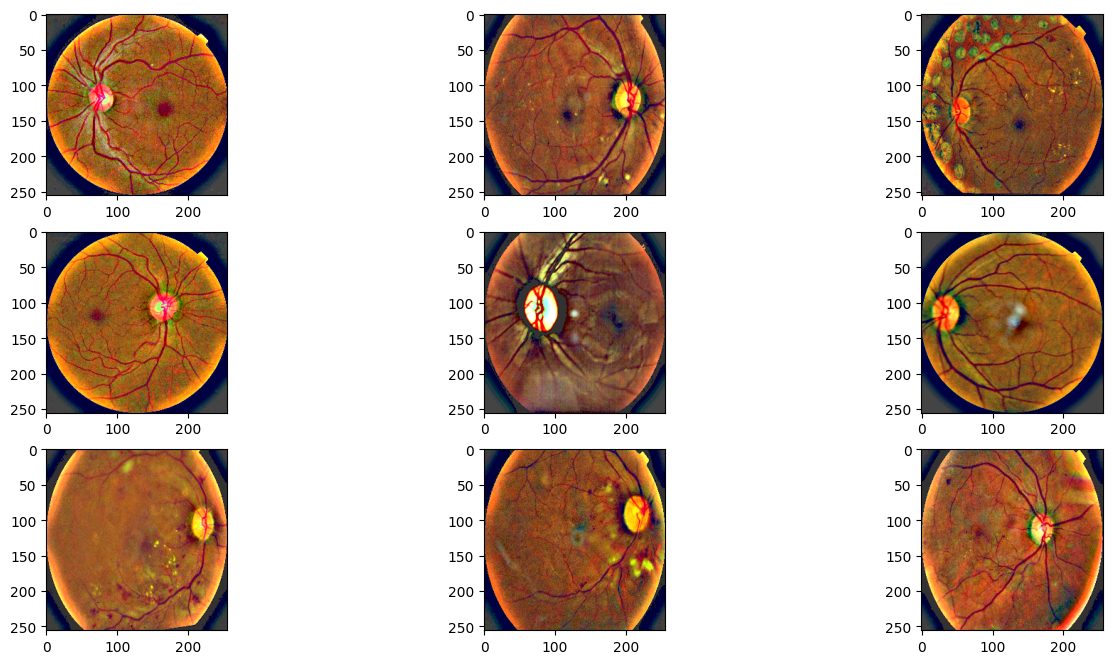

In [ ]:
plt.figure(figsize=(16,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])

y_test_multi = np.empty(y_test.shape, dtype=y_test.dtype)
y_test_multi[:, 4] = y_test[:, 4]

for i in range(3, -1, -1):
    y_test_multi[:, i] = np.logical_or(y_test[:, i], y_test_multi[:, i+1])

print("Original y_test:", y_test.sum(axis=0))
print("Multilabel version:", y_test_multi.sum(axis=0))

In [ ]:
y_val_multi = np.empty(y_test.shape, dtype=y_test.dtype)
y_val_multi[:, 4] = y_val[:, 4]

for i in range(3, -1, -1):
    y_val_multi[:, i] = np.logical_or(y_val[:, i], y_val_multi[:, i+1])

print("Original y_valid:", y_val.sum(axis=0))
print("Multilabel version:", y_val_multi.sum(axis=0))

Original y_valid: [172  40 104  22  28]
Multilabel version: [366 194 154  50  28]


In [ ]:
print(y_test_multi.shape)
print(x_test.shape)
print(y_val_multi.shape)
print(x_valid.shape)

(366, 5)
(366, 256, 256, 3)
(366, 5)
(366, 256, 256, 3)


In [ ]:
np.save('y_test1.npy',y_test_multi)
np.save('x_test1.npy',x_test)

In [ ]:
np.save('y_valid.npy',y_val_multi)
np.save('x_valid.npy',x_valid)

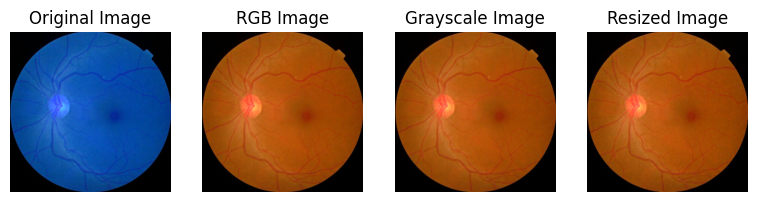

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
def center_crop(img):
    h, w, _ = img.shape
    min_dim = min(h, w)
    start_x = (w - min_dim) // 2
    start_y = (h - min_dim) // 2
    return img[start_y:start_y + min_dim, start_x:start_x + min_dim]
# Create a tone mapper
tone_mapper = cv2.createTonemapReinhard(gamma=0.5, intensity=0.0, light_adapt=1.0, color_adapt=0.0)

def preprocess_image1(image_path, desired_size=256):
    if not os.path.exists(image_path):
        print(f"Error: File not found - {image_path}")
        return None

    im = cv2.imread(image_path)
    if im is None:
        print(f"Error: Unable to read image - {image_path}")
        return None

    # Display Original Image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 5, 1)
    plt.imshow(im)
    plt.title('Original Image')
    plt.axis('off')


    # Convert to RGB
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, 2)
    plt.imshow(im_rgb)
    plt.title('RGB Image')
    plt.axis('off')

    # Convert to grayscale


    imgray = crop_image_from_gray(im_rgb)
    plt.subplot(1, 5, 3)
    plt.imshow(imgray)
    plt.title('Grayscale Image')
    plt.axis('off')

    # Resize the image
    im_resized = cv2.resize(imgray, (desired_size, desired_size))
    plt.subplot(1, 5, 4)
    plt.imshow(im_resized)
    plt.title('Resized Image')
    plt.axis('off')



    return im_resized

# Example usage
image_path = '/content/drive/MyDrive/archive (1)/test_images/test_images/e4dcca36ceb4.png'  # Replace with your actual image path
preprocessed_image = preprocess_image1(image_path)

